In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette('Set2')

In [2]:
df=pd.read_excel('The-Big-List-20210117.xlsx',sheet_name='Reviewed',usecols='A:F')

In [3]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  3702 non-null   int64 
 1   Brand     3702 non-null   object
 2   Variety   3702 non-null   object
 3   Style     3702 non-null   object
 4   Country   3702 non-null   object
 5   Stars     3702 non-null   object
dtypes: int64(1), object(5)
memory usage: 173.7+ KB


In [5]:
df.Stars.unique()

array([5, 3.5, 4.5, 4, 3.75, 4.25, 3, 3.25, 4.75, 2.5, 2, 0.75, 0, 1.25,
       2.75, 0.5, 1.5, 2.25, 1, 0.25, 1.75, 'Unrated', 1.1, 2.1, 0.9, 3.1,
       4.125, 3.125, 2.125, 2.9, 0.1, 2.8, 3.7, 3.4, 3.6, 2.85, 2.3, 3.2,
       3.65, 1.8], dtype=object)

In [6]:
#Replace 'Unrated' with 0
df.Stars.replace(to_replace={'Unrated':0},inplace=True)
df.Stars=df.Stars.astype(float).round(1)

# Country

In [7]:
#Ranking average country rating 
country_s=df.groupby('Country').agg({'Country':'count','Stars':'mean'})
country_s=country_s.rename({'Country':'Total'},axis=1)
country_s.Stars=country_s.Stars.round(1)
country_s = country_s.sort_values(by =['Total','Stars'],ascending = False).reset_index()

In [8]:
country_s.head(10)

,Country,Total,Stars
0,Japan,684,3.9
1,United States,462,3.6
2,South Korea,413,3.9
3,Taiwan,372,3.9
4,China,245,3.5
5,Thailand,212,3.4
6,Malaysia,208,4.2
7,Hong Kong,191,3.9
8,Indonesia,161,4.1
9,Singapore,140,4.1


In [9]:
country_s.describe()

,Total,Stars
count,51.000000,51.000000
mean,72.588235,3.456863
std,140.343319,0.487136
min,1.000000,2.000000
25%,3.000000,3.200000
50%,6.000000,3.500000
75%,53.500000,3.700000
max,684.000000,4.300000


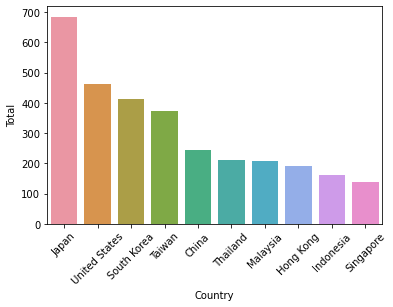

In [10]:
sns.barplot(x='Country',y='Total',data=country_s[0:10])
plt.xticks(rotation=45)
plt.show()

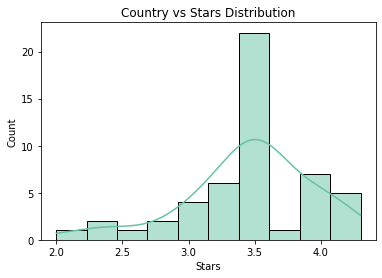

In [139]:
sns.histplot(country_s.Stars,bins=10,kde=True)
plt.title('Country vs Stars Distribution')

plt.show()

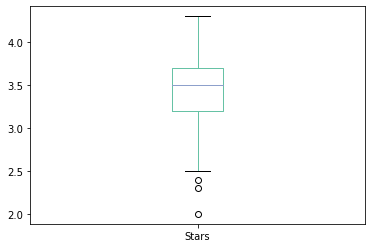

In [140]:
country_s['Stars'].plot(kind='box')
plt.show()

<AxesSubplot:ylabel='Stars'>

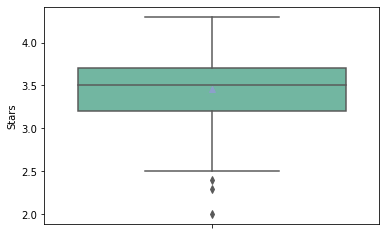

In [243]:
sns.boxplot(y='Stars',data=country_s,showmeans=True)

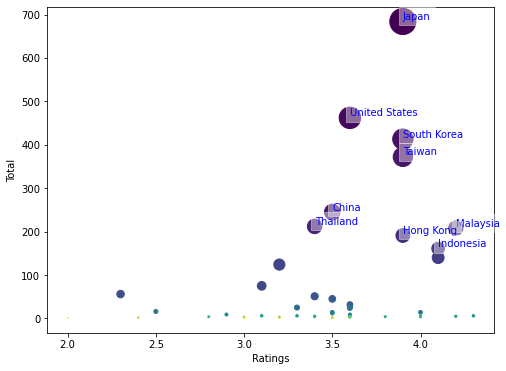

In [141]:
annotations=[i for i in country_s[0:9]['Country']]
plt.figure(figsize=(8,6))
plt.scatter('Stars','Total',
           s='Total',
           data=country_s,
           c=country_s.Country.index)
plt.xlabel('Ratings')
plt.ylabel('Total')
for i,label in enumerate(annotations):
    plt.text(country_s.Stars[i],country_s.Total[i],label,color='blue', verticalalignment='bottom',  bbox=dict(facecolor='w',edgecolor = 'w',alpha=0.4))
plt.show()


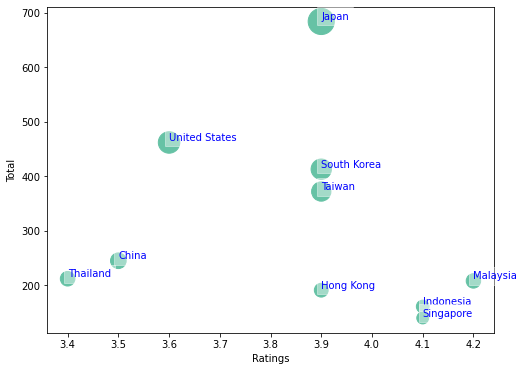

In [181]:
annotations=[i for i in country_s[0:10]['Country']]
plt.figure(figsize=(8,6))
plt.scatter('Stars','Total',
           s='Total',
           data=country_s[0:10]) 
plt.xlabel('Ratings')
plt.ylabel('Total')
for i,label in enumerate(annotations):
    plt.text(country_s.Stars[i],country_s.Total[i],label,color='blue', verticalalignment='bottom',  bbox=dict(facecolor='w',edgecolor = 'w',alpha=0.4))
plt.show()


In [142]:
#Ranking average brand rating 
brand_s=df.groupby('Brand').agg({'Brand':'count','Stars':'mean'})
brand_s=brand_s.rename({'Brand':'Total'},axis=1)
brand_s.Stars=brand_s.Stars.round(1)
brand_s = brand_s.sort_values(by =['Total','Stars'],ascending = False).reset_index()

In [143]:
brand_s.loc[brand_s.Total>6].sum()

Brand    NissinMaruchanNongshimMyojoSamyang FoodsPaldoM...
Total                                                 2768
Stars                                                406.7
dtype: object

In [144]:
brand_s[1:].describe()

,Total,Stars
count,543.000000,543.000000
mean,5.941068,3.552855
std,13.054535,1.101218
min,1.000000,0.000000
25%,1.000000,3.200000
50%,2.000000,3.800000
75%,5.000000,4.200000
max,131.000000,5.000000


In [145]:
brand_s[0:10]

,Brand,Total,Stars
0,Nissin,476,3.9
1,Maruchan,131,3.7
2,Nongshim,119,4.0
3,Myojo,111,3.9
4,Samyang Foods,103,4.1
5,Paldo,84,4.0
6,Mama,71,3.6
7,Sapporo Ichiban,69,3.8
8,Indomie,56,4.1
9,Ottogi,51,3.4


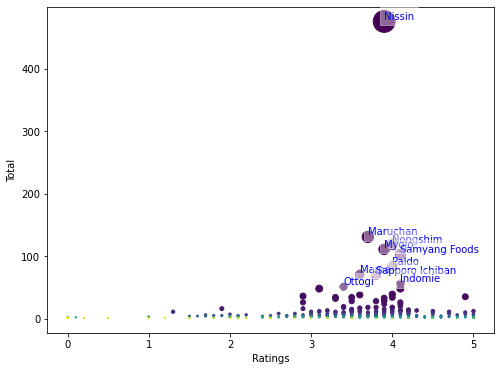

In [146]:
annotations=[i for i in brand_s[0:10]['Brand']]
plt.figure(figsize=(8,6))
plt.scatter('Stars','Total',
           s='Total',
           data=brand_s,
           c=brand_s.Brand.index)
plt.xlabel('Ratings')
plt.ylabel('Total')
for i,label in enumerate(annotations):
    plt.text(brand_s.Stars[i],brand_s.Total[i],label,color='blue', verticalalignment='bottom',  bbox=dict(facecolor='w',edgecolor = 'w',alpha=0.4))
plt.show()


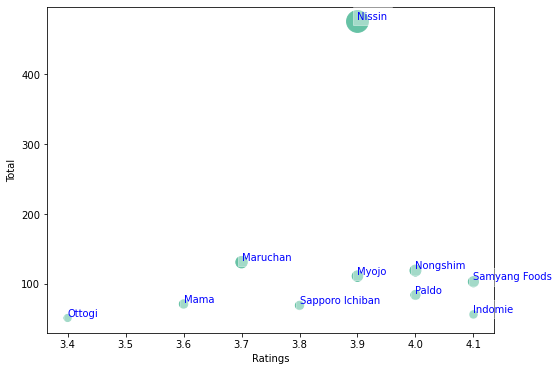

In [147]:
annotations=[i for i in brand_s[0:10]['Brand']]
plt.figure(figsize=(8,6))
plt.scatter('Stars','Total',
           s='Total',
           data=brand_s[0:10])
plt.xlabel('Ratings')
plt.ylabel('Total')
for i,label in enumerate(annotations):
    plt.text(brand_s.Stars[i],brand_s.Total[i],label,color='blue', verticalalignment='bottom',  bbox=dict(facecolor='w',edgecolor = 'w',alpha=0.4))
plt.show()


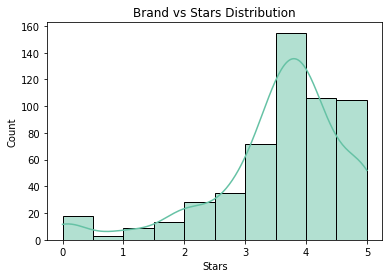

In [152]:
sns.histplot(brand_s.Stars,bins=10,kde=True)
plt.title('Brand vs Stars Distribution')

plt.show()

In [149]:
style_s = df.groupby('Style').agg({'Style':'count','Stars':'mean'})
style_s=style_s.rename({'Style':'Total'},axis=1).reset_index()
style_s.Stars=style_s.Stars.round(1)

In [150]:
style_s.describe()

,Total,Stars
count,8.000000,8.00000
mean,462.750000,3.88750
std,723.316321,0.53569
min,1.000000,3.50000
25%,2.500000,3.57500
50%,110.500000,3.65000
75%,674.750000,3.95000
max,2095.000000,5.00000


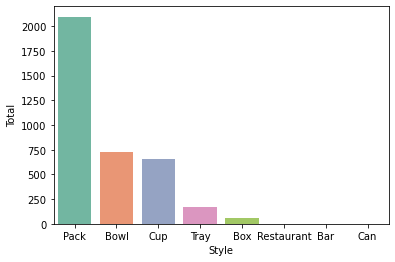

In [153]:
sns.barplot(x='Style',y='Total',data=style_s.sort_values(by='Total',ascending=False))
plt.show()

In [154]:
df['Variety']=df['Variety'].replace('[^a-zA-Z]',' ')

# Spicy

In [155]:
taste=['Spicy','Chili','Hot','Yum','Curry','Pepper','Mala','Spice','Ginger']
df['Spicy']=df['Variety'].apply(lambda x : 'Spicy' if sum(1 for w in x.split(' ') if w in taste)!=0 else 'NotSpicy')

In [156]:
df.groupby('Spicy').agg({'Stars':'mean','Spicy':'count'})

,Stars,Spicy
Spicy,,
NotSpicy,3.686730,2826
Spicy,3.829795,876


# Flavours

In [231]:
FV={'Chicken':'Chicken',
    'Beef':['Beef','Meat','Cow'],
    'Seafood':['Shrimp','Fish','Crab','Seafood','Oyster','Lobster','Goong','Prawn'],
    'Pork':['Pork','Moo','Prok']}

In [232]:
df['Flavour']=df['Variety'].apply(lambda x : list(k for w in x.split(' ') for k,v in FV.items() if w in v))


In [233]:
df=df.explode('Flavour').fillna('Other')

In [234]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Spicy,Flavour
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,NotSpicy,Seafood
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,Spicy,Other
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,Spicy,Seafood
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NotSpicy,Other
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NotSpicy,Other


In [235]:
df.Flavour.value_counts()

Other      2400
Chicken     630
Seafood     545
Beef        380
Pork        172
Name: Flavour, dtype: int64

In [236]:
df.loc[(df.Flavour=='Seafood')& (df.Spicy=='NotSpicy')]

,Review #,Brand,Variety,Style,Country,Stars,Spicy,Flavour
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,NotSpicy,Seafood
47,3655,Myojo,Ramen Seafood Tonkotsu,Pack,United States,5.0,NotSpicy,Seafood
60,3642,Itomen,Seafood Miso Ramen,Pack,Japan,3.2,NotSpicy,Seafood
72,3630,Sau Tao,Instant Noodle King Lobster Soup Flavour,Pack,Hong Kong,3.8,NotSpicy,Seafood
93,3609,Vi Huong,Shrimp Instant Noodles,Pack,Vietnam,3.5,NotSpicy,Seafood
...,...,...,...,...,...,...,...,...
3654,48,Indomie,Shrimp Flavor,Pack,Indonesia,3.0,NotSpicy,Seafood
3668,34,Maruchan,Ramen Noodle Soup Shrimp,Pack,United States,2.0,NotSpicy,Seafood
3669,33,Koka,Mi Hai Tom Prawn,Pack,Singapore,3.8,NotSpicy,Seafood
3670,32,Koka,Mi Hai Cua Crab Flavor,Pack,Singapore,3.5,NotSpicy,Seafood


In [237]:
Flavour_Other=df.loc[df.Flavour=='Other']

In [238]:
#Ranking average country rating 
flavour_s=df.groupby('Flavour').agg({'Flavour':'count','Stars':'mean'})
flavour_s=flavour_s.rename({'Flavour':'Total'},axis=1)
flavour_s.Stars=flavour_s.Stars.round(1)
flavour_s = flavour_s.sort_values(by =['Total','Stars'],ascending = False).reset_index()

In [225]:
flavour_s

,Flavour,Total,Stars
0,Other,2400,3.8
1,Chicken,516,3.5
2,Seafood,465,3.8
3,Beef,348,3.7
4,Pork,160,3.6


# Word Clound

In [226]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [227]:
word=df['Variety'].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0)

Meat Theme

There are 119209 words in the combination of all review.


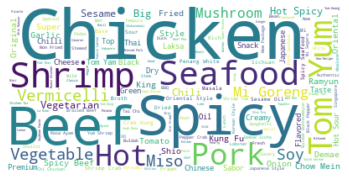

In [228]:
text = " ".join(desc for desc in df.Variety)
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)

stopwords.update(['Flavor','Noodle','Instant','Soup','Artificial','Flavour','Noodles','Ramen','Soba','Udon','Sauce','Tonkotsu','Curry','Bowl','Kimchi','Cup','Yakisoba','Shoyu','Rice'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 119209 words in the combination of all review.


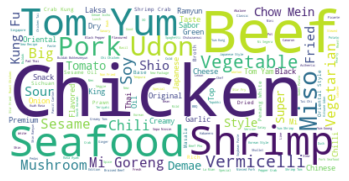

In [229]:
#del spicy
text = " ".join(desc for desc in df.Variety)
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Flavor','Noodle','Instant','Soup','Artificial','Flavour','Noodles','Ramen','Soba','Sauce','Tonkotsu','Curry','Bowl','Kimchi','Cup','Spicy','Hot','Yakisoba','Shoyu','Rice'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Soup/Taste Theme

There are 119209 words in the combination of all review.


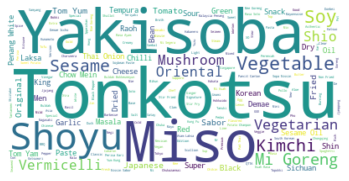

In [239]:
text_F_Other = " ".join(desc for desc in Flavour_Other.Variety)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['flavor','noodle','Curry','Instant','big','Soup','Artificial','Taste','Bowl','Style','Soba','Flavour','Rice','Sauce','Udon','Noodles','Ramen','Chili','ramyun','Spicy','Hot','Cup','Bowl'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_F_Other)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# NMF

In [169]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
temp=df['Variety']

In [171]:
tfidf=TfidfVectorizer(stop_words=['flavor','big','flavour','ramen','noodle','noodles','top','instant','oriental','artificial','taste','bowl','Style','cup','soup','Flavour','Rice',
                                  'Sauce','Noodles','Ramen','ramyun','premium','rice','vermicelli','Cup','udon','with','new','style','yam','green','sauce'])

In [172]:
desc=tfidf.fit_transform(temp)

In [173]:
words = tfidf.get_feature_names()

In [174]:
len(words)

1886

In [175]:
print(desc.shape)

(3727, 1886)


In [176]:
nmf = NMF(n_components=15)
nmf_features = nmf.fit_transform(desc) 

In [177]:
components_temp = pd.DataFrame(nmf.components_,columns=words)

In [178]:
for i in range(0,15):
    components = components_temp.iloc[i,:].nlargest()
    print("group:{}\n{}\n".format(i+1,components))
    


group:1
chicken     3.713104
abalone     0.107782
mushroom    0.091572
creamy      0.067071
onion       0.059387
Name: 0, dtype: float64

group:2
beef          3.330016
braised       0.158443
pho           0.128321
sauerkraut    0.087595
stew          0.070604
Name: 1, dtype: float64

group:3
spicy      4.363217
sichuan    0.164480
king       0.143671
demae      0.110811
korean     0.082618
Name: 2, dtype: float64

group:4
tom       2.179689
yum       1.686492
creamy    0.456415
kung      0.267670
goong     0.226219
Name: 3, dtype: float64

group:5
curry       2.763538
white       0.489325
penang      0.462609
laksa       0.137011
malaysia    0.121622
Name: 4, dtype: float64

group:6
seafood    2.648543
xo         0.164791
chili      0.105372
demae      0.097465
neoguri    0.093894
Name: 5, dtype: float64

group:7
pork        2.821176
minced      0.388024
bone        0.184886
ribs        0.181015
mushroom    0.164543
Name: 6, dtype: float64

group:8
shrimp    2.582554
lime      0.09564

## statistics test

In [179]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Spicy,Flavour
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,NotSpicy,Seafood
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,Spicy,Other
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,Spicy,Seafood
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NotSpicy,Other
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NotSpicy,Other


<AxesSubplot:>

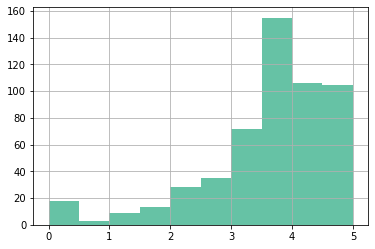

In [180]:
brand_s.Stars.hist()